In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Generate clusters
n_samples = 100000000
n_features = 2
centers = 25
cluster_std = 100
sz = 10000

# Generate random sizes for each cluster
sizes = np.random.randint(1000, 100001, size=centers)

In [9]:
# Generate clusters with adjusted range for cluster centers
cluster_centers_0 = np.random.uniform(-sz, sz, size=centers)
cluster_centers_1 = np.random.uniform(-sz, sz, size=centers)

X = np.empty((0, n_features))
y = np.empty(0)

for i in range(centers):
    cluster_points_0 = np.random.normal(loc=cluster_centers_0[i], scale=cluster_std, size=(sizes[i], 1))
    cluster_points_1 = np.random.normal(loc=cluster_centers_1[i], scale=cluster_std, size=(sizes[i], 1))
    cluster_points = np.hstack((cluster_points_0, cluster_points_1))
    
    X = np.vstack((X, cluster_points))
    y = np.hstack((y, np.full(sizes[i], i)))  

In [10]:
# Add noise points
n_noise = 2000
noise_points = np.random.uniform(low=-sz, high=sz, size=(n_noise, n_features))
X = np.vstack([X, noise_points])
y = np.hstack([y, np.full(n_noise, -1)])  # Assign label -1 to noise points

In [11]:
# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)
    
X = X[indices]
y = y[indices]

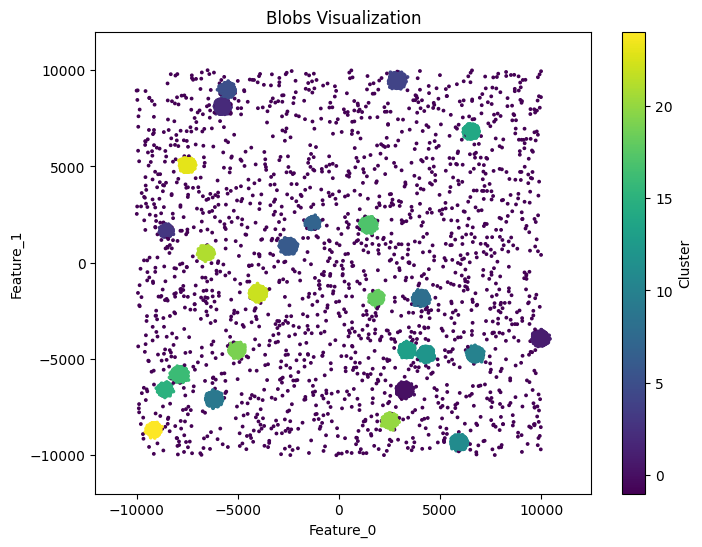

In [12]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=3)
plt.title('Blobs Visualization')
plt.xlabel('Feature_0')
plt.ylabel('Feature_1')
plt.colorbar(label='Cluster')

# Adjusting plot limits to fit all points within the frame
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
x_margin = (x_max - x_min) * 0.1
y_margin = (y_max - y_min) * 0.1
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.ylim(y_min - y_margin, y_max + y_margin)

plt.savefig('blobs_visualization.png')  # Save plot as an image
plt.show()

In [13]:
# Save points to a .csv file without the 'Label' column
df = pd.DataFrame(X)

print(df.describe())

print(df.head())

largest_x_value = df[0].max()
print("The largest x value in the CSV file is:", largest_x_value)

                  0             1
count  1.316045e+06  1.316045e+06
mean   2.438867e+02 -1.482616e+03
std    5.414214e+03  5.695073e+03
min   -9.997726e+03 -9.999687e+03
25%   -5.464796e+03 -5.843329e+03
50%    2.327379e+03 -3.733319e+03
75%    4.134465e+03  1.922717e+03
max    1.042461e+04  9.999511e+03
             0            1
0  9922.480240 -3931.263547
1 -1311.407560  1989.015314
2 -3982.379265 -1524.057905
3 -5197.762023 -4599.403590
4 -7802.320580 -5794.826720
The largest x value in the CSV file is: 10424.611421371837


In [14]:
df.to_csv('python_data.csv', index=False, header=False, encoding='utf-8')

In [15]:
# Load the CSV file into a DataFrame
df = pd.read_csv('python_data.csv', header=None, encoding='utf-8')

print(df.describe())

print(df.head())

largest_x_value = df[0].max()
print("The largest x value in the CSV file is:", largest_x_value)

                  0             1
count  1.316045e+06  1.316045e+06
mean   2.438867e+02 -1.482616e+03
std    5.414214e+03  5.695073e+03
min   -9.997726e+03 -9.999687e+03
25%   -5.464796e+03 -5.843329e+03
50%    2.327379e+03 -3.733319e+03
75%    4.134465e+03  1.922717e+03
max    1.042461e+04  9.999511e+03
             0            1
0  9922.480240 -3931.263547
1 -1311.407560  1989.015314
2 -3982.379265 -1524.057905
3 -5197.762023 -4599.403590
4 -7802.320580 -5794.826720
The largest x value in the CSV file is: 10424.611421371836


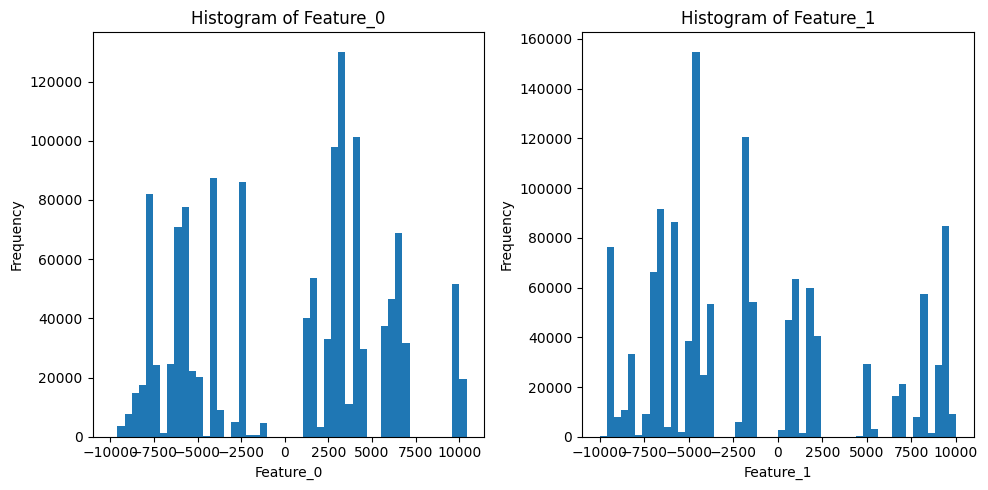

In [16]:
# Plot histograms of the features
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df[0], bins=50)
plt.title('Histogram of Feature_0')
plt.xlabel('Feature_0')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df[1], bins=50)
plt.title('Histogram of Feature_1')
plt.xlabel('Feature_1')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
